# <center> **Decision Trees and Random Forest** </center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris = load_iris(as_frame=True)['frame']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


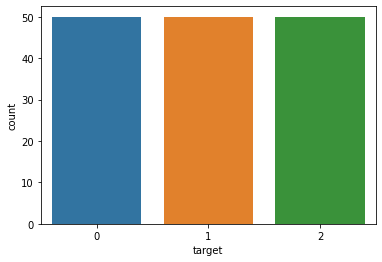

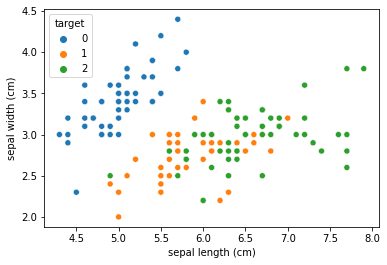

### Decision Tree

https://www.youtube.com/watch?v=LDRbO9a6XPU

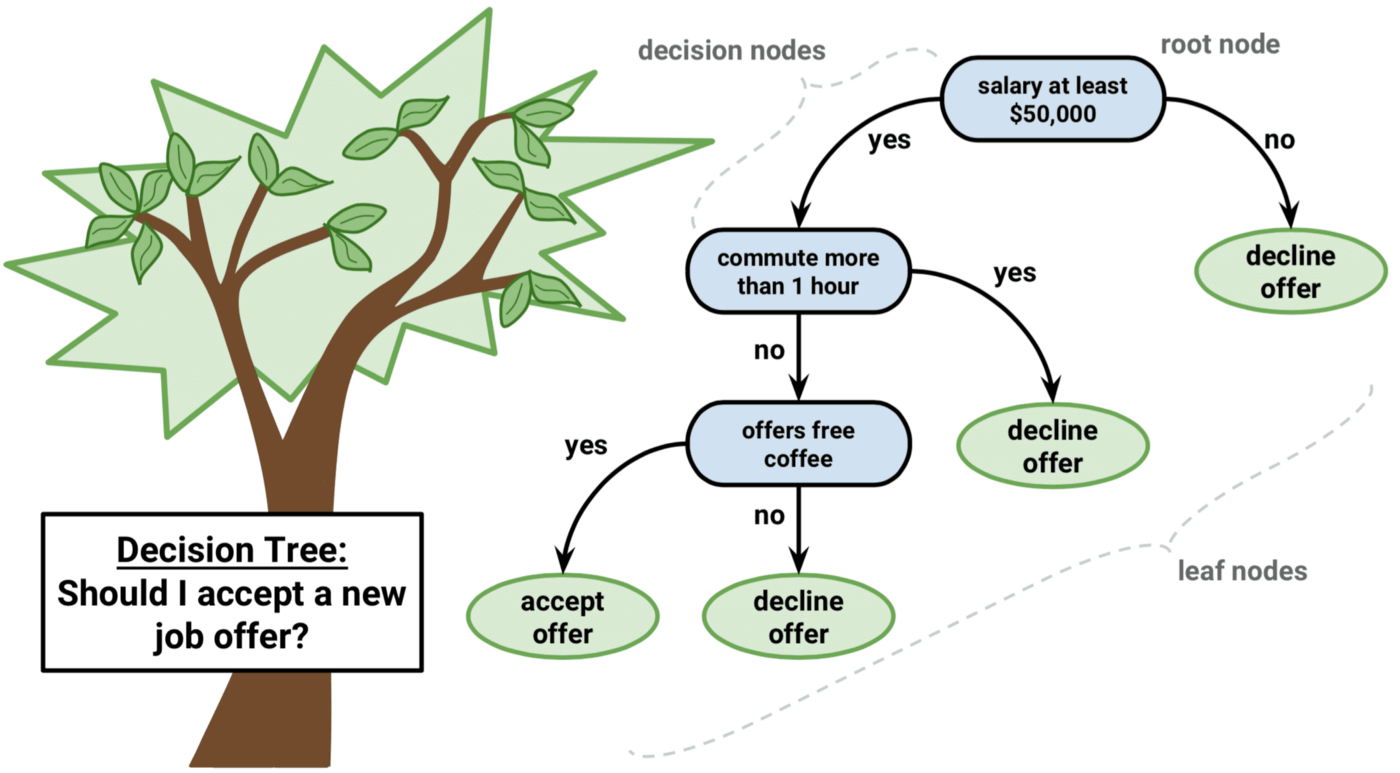

In [7]:
# Random Forest/DT -> feature importance

((105, 2), (45, 2))

2    35
1    35
0    35
Name: target, dtype: int64

2    15
1    15
0    15
Name: target, dtype: int64

In [13]:
# label distribution on train and test must be similar

DecisionTreeClassifier(max_depth=5, max_features=2)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.67      0.53      0.59        15
           2       0.67      0.67      0.67        15

    accuracy                           0.73        45
   macro avg       0.72      0.73      0.72        45
weighted avg       0.72      0.73      0.72        45



In [17]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

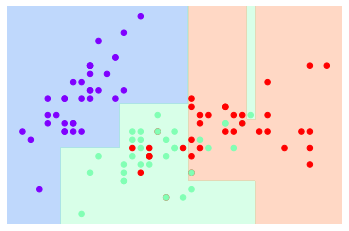

[Text(544.921875, 498.3, 'sepal length (cm) <= 5.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(261.5625, 407.70000000000005, 'sepal width (cm) <= 2.8\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(174.375, 317.1, 'sepal length (cm) <= 4.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(87.1875, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(261.5625, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(348.75, 317.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(828.28125, 407.70000000000005, 'sepal length (cm) <= 6.25\ngini = 0.539\nsamples = 70\nvalue = [3, 32, 35]'),
 Text(523.125, 317.1, 'sepal width (cm) <= 3.35\ngini = 0.479\nsamples = 34\nvalue = [3, 23, 8]'),
 Text(435.9375, 226.5, 'sepal length (cm) <= 5.55\ngini = 0.383\nsamples = 31\nvalue = [0, 23, 8]'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(523.125, 135.89999999999998, 'sepal width (cm) <= 2.85\ngini = 0.417\nsa

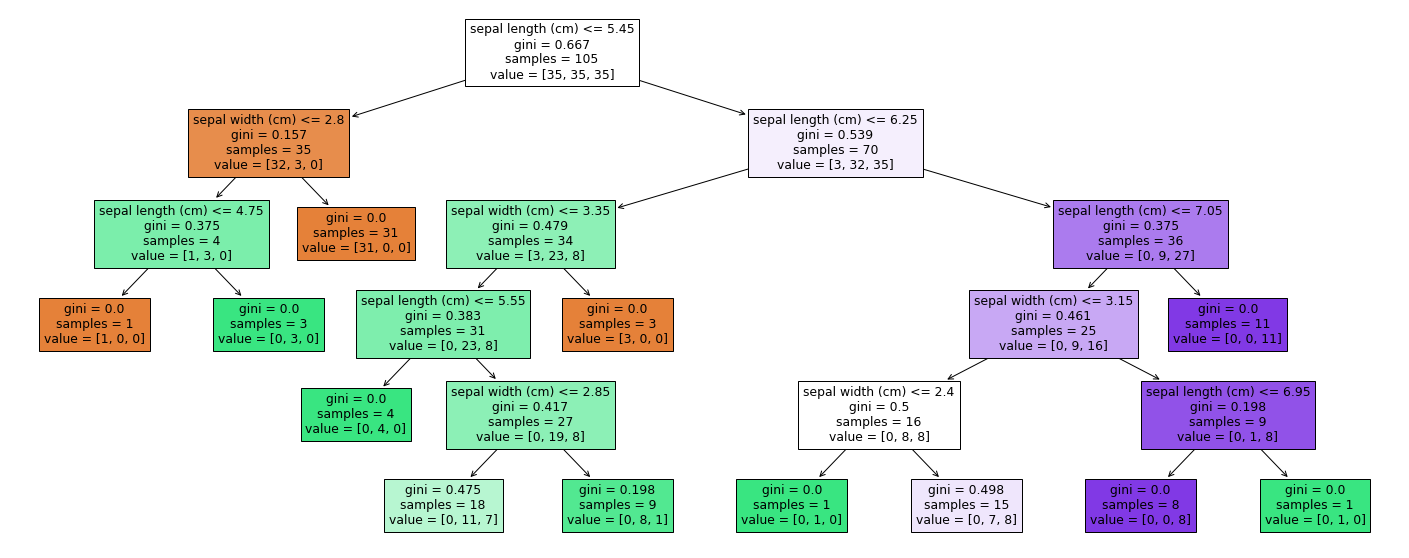

- **Preprunning**: DecisionTreeClassifer(): max_depth, max_features, min_sample_split, min_sample_leaf
- **Postprunning**: costcomplexityprunning()

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

In [20]:
# 80% data each group, different data set (RF) -> bagging
# sequential learning (adaboost) -> boosting

https://www.youtube.com/watch?v=tjy0yL1rRRU

RandomForestClassifier()

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.62      0.67      0.65        15
           2       0.64      0.60      0.62        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45



In [26]:
# compare to DT

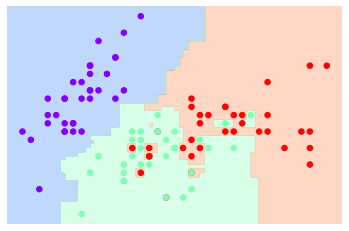

In [27]:
visualize_classifier(forest, X_train, y_train)

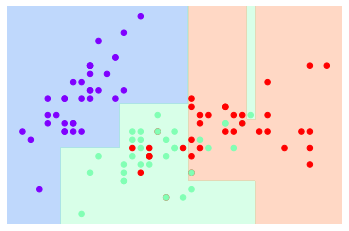

In [28]:
visualize_classifier(tree, X_train, y_train)

In [29]:
forest.estimators_[:6]

[DecisionTreeClassifier(max_features='auto', random_state=307025264),
 DecisionTreeClassifier(max_features='auto', random_state=334711053),
 DecisionTreeClassifier(max_features='auto', random_state=758734380),
 DecisionTreeClassifier(max_features='auto', random_state=800159632),
 DecisionTreeClassifier(max_features='auto', random_state=546313076),
 DecisionTreeClassifier(max_features='auto', random_state=1734545526)]

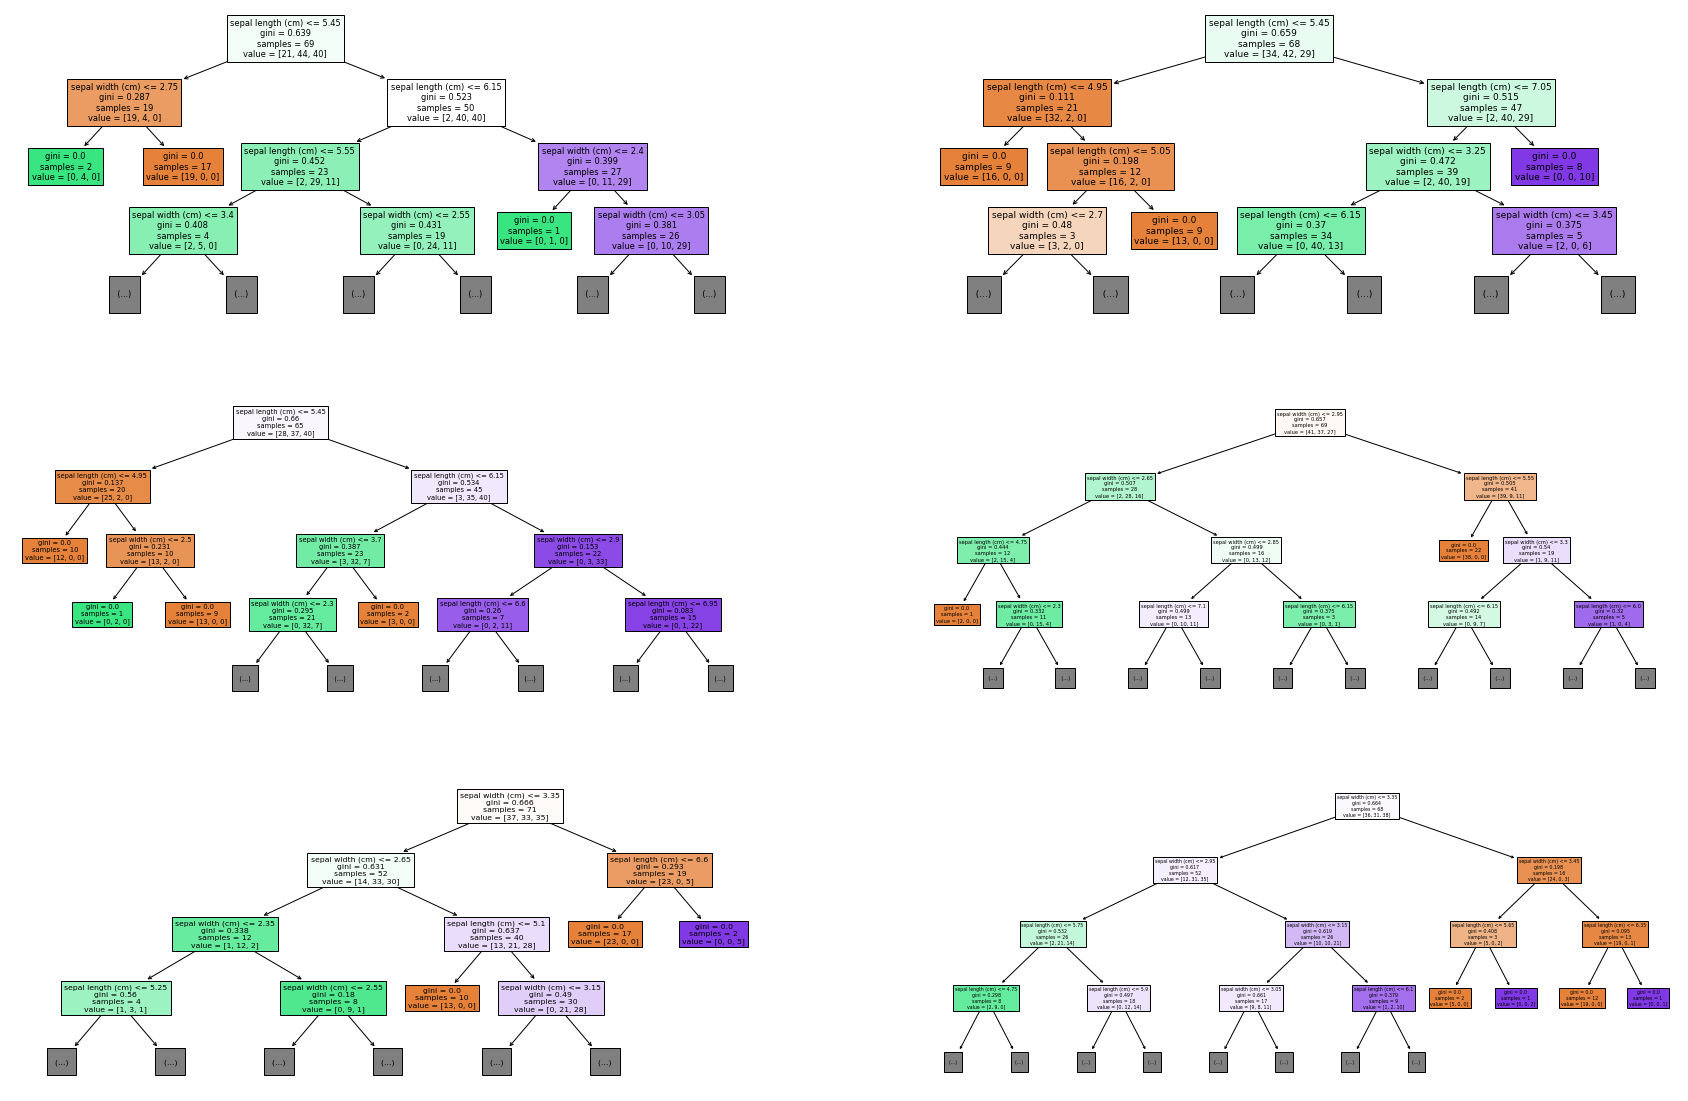

**Random forest**:
1. Bao nhieu cay thi la du? 
2. Bao nhieu tang thi la du? -> experiments: **log2(n_features)**
3. Bao nhieu bien thi la du?

In [31]:
# max_features -> sqrt(total_features)
# max_depth -> log2(total_features)
# n_estimators -> total_feature - max_features + 1
# max_sample -> 0.8

['sepal length (cm)', 'sepal width (cm)']

array([0.64232295, 0.35767705])

,names,importance
0,sepal length (cm),0.642323
1,sepal width (cm),0.357677


In [35]:
from sklearn.feature_selection import SelectFromModel

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.4)

array([[5.1],
       [6.2],
       [5.1],
       [6.8],
       [5.7],
       [6.7],
       [4.9],
       [5.1],
       [4.4],
       [7.1],
       [6.5],
       [4.9],
       [5. ],
       [6. ],
       [5.5],
       [7.2],
       [5. ],
       [4.7],
       [6.7],
       [5.9],
       [5.4],
       [6.3],
       [7.6],
       [7.7],
       [5.7],
       [4.6],
       [5.1],
       [5.4],
       [6.9],
       [5.5],
       [5.7],
       [5.1],
       [5.8],
       [5.6],
       [4.8],
       [4.8],
       [6.7],
       [6.3],
       [7.9],
       [5.1],
       [6.4],
       [4.6],
       [6. ],
       [5.5],
       [6.3],
       [6. ],
       [4.8],
       [7.7],
       [6.1],
       [5.7],
       [5.8],
       [4.5],
       [5.5],
       [6.4],
       [6.1],
       [6.3],
       [5.1],
       [5.7],
       [5. ],
       [6.7],
       [6.8],
       [5.2],
       [7.2],
       [6. ],
       [6.4],
       [6.3],
       [5.6],
       [4.9],
       [6.9],
       [6.5],
       [5.6],
      

In [38]:
X_train['sepal length (cm)']

98     5.1
68     6.2
19     5.1
143    6.8
99     5.7
      ... 
37     4.9
79     5.7
33     5.5
94     5.6
3      4.6
Name: sepal length (cm), Length: 105, dtype: float64

### SVM

In [39]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Bias - Variance**
- Bias = Sum(Predict - Label)
- Variance 

**Overfit - Fit - Underfit**
- Bias - Variance?
- Evaluation metric train vs test?

**SVM**
Non-linear:
- Soft margin
- Kernel tricks

array([0, 1, 2])

In [41]:
y_binary = y.gt(0).astype(int)
y_binary.unique()
# gt -> greater than

array([0, 1])

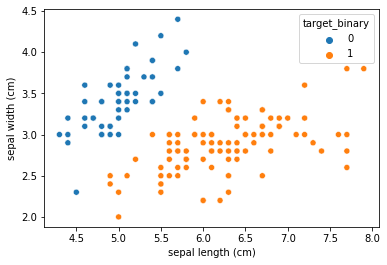

SVC(C=10, kernel='linear')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



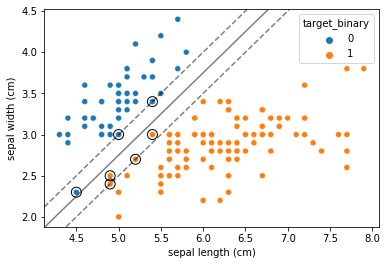

https://www.youtube.com/watch?v=efR1C6CvhmE